# 고혈압 환자들과 각 질병들의 상관관계

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False


# altair 라이브러리 사용
!pip install altair
import altair as alt

plt.rcParams['figure.figsize'] = (10, 6) # 그래프 크기 설정

In [2]:
검진정보 = pd.read_csv(
    "./검진정보.csv",
)
심장질환 = pd.read_csv(
    "./심장질환.csv"
)

# 고혈압 상태에 따른 간질환 여부

In [3]:
df = 검진정보.groupby(["혈압","성별","연령대", "간질환"]).count()
df.reset_index(inplace=True)
df["사람수"]=df["기준년도"] 
df["성별-연령대"] = df["연령대"] + '-'+ df["성별"].astype(str)
df.drop(df.loc[:,"기준년도":"데이터 공개일자"],axis=1,inplace=True)

# 혈압상태 - 간질환
# 간질환 - 정상 포함

alt.Chart(df).mark_bar().encode(

    # tell Altair which field to group columns on
    x=alt.X('혈압:N', title=None),

    # tell Altair which field to use as Y values and how to calculate
    y=alt.Y('sum(사람수):Q',
        axis=alt.Axis(
            grid=False,
            title=None)),

    # tell Altair which field to use to use as the set of columns to be  represented in each group
    column=alt.Column('성별-연령대:N', title=None),

    # tell Altair which field to use for color segmentation 
    color=alt.Color('간질환:N',
            scale=alt.Scale(
                # make it look pretty with an enjoyable color pallet
                range=['#ffcc5c','#ff6f69', '#96ceb4'],  
            ),
        ))\
    .configure_view(
        # remove grid lines around column clusters
        strokeOpacity=0    
    )

alt.Chart(...)

# 정상혈압이면 간질환이 있을까?

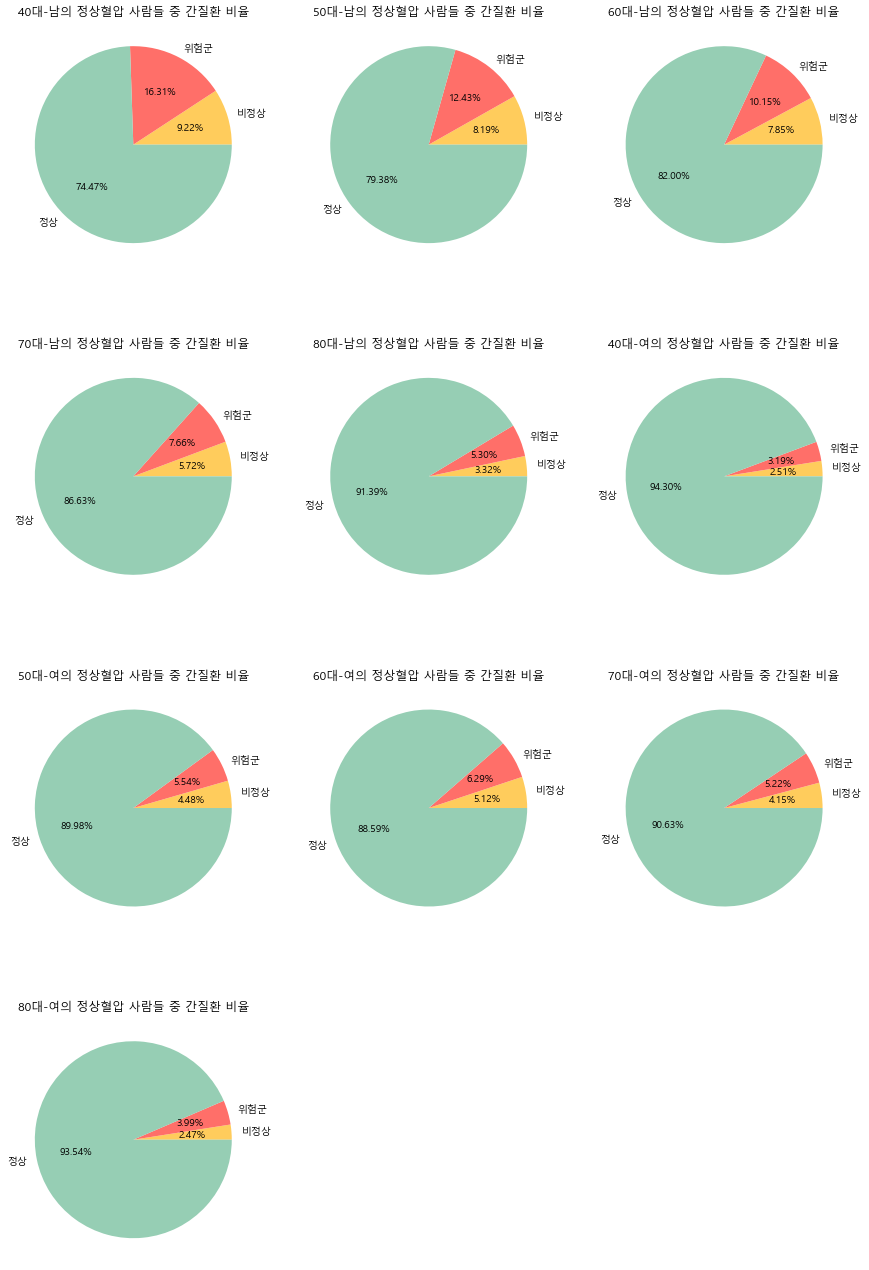

In [16]:
df = 검진정보.groupby(["혈압","성별","연령대", "간질환"]).count()
df.reset_index(inplace=True)
df["사람수"]=df["기준년도"] 
df["성별-연령대"] = df["연령대"] + '-'+ df["성별"].astype(str)
df.drop(df.loc[:,"기준년도":"데이터 공개일자"],axis=1,inplace=True)

index = df[df['혈압'] !='정상혈압'].index
df.drop(index, inplace=True)

n = len(df['성별-연령대'].unique())
j = 1
plt.figure(figsize = (15,60))

for i in (df['성별-연령대'].unique()):
    plt.subplot(n,3,j)
    df1 = df[df['성별-연령대']==i]
    df1 = df1.groupby(['간질환'])[['사람수']].sum()
    df1.reset_index(inplace=True)
    x = df1['사람수'].values
    labels = df1['간질환'].values
    color = ['#ffcc5c','#ff6f69', '#96ceb4']
    plt.pie(x,labels=labels, autopct='%.2f%%', colors = color) 
    plt.title(i+'의 정상혈압 사람들 중 간질환 비율')
    j += 1

plt.show()

# 고혈압이 있으면 간질환이 있을까?

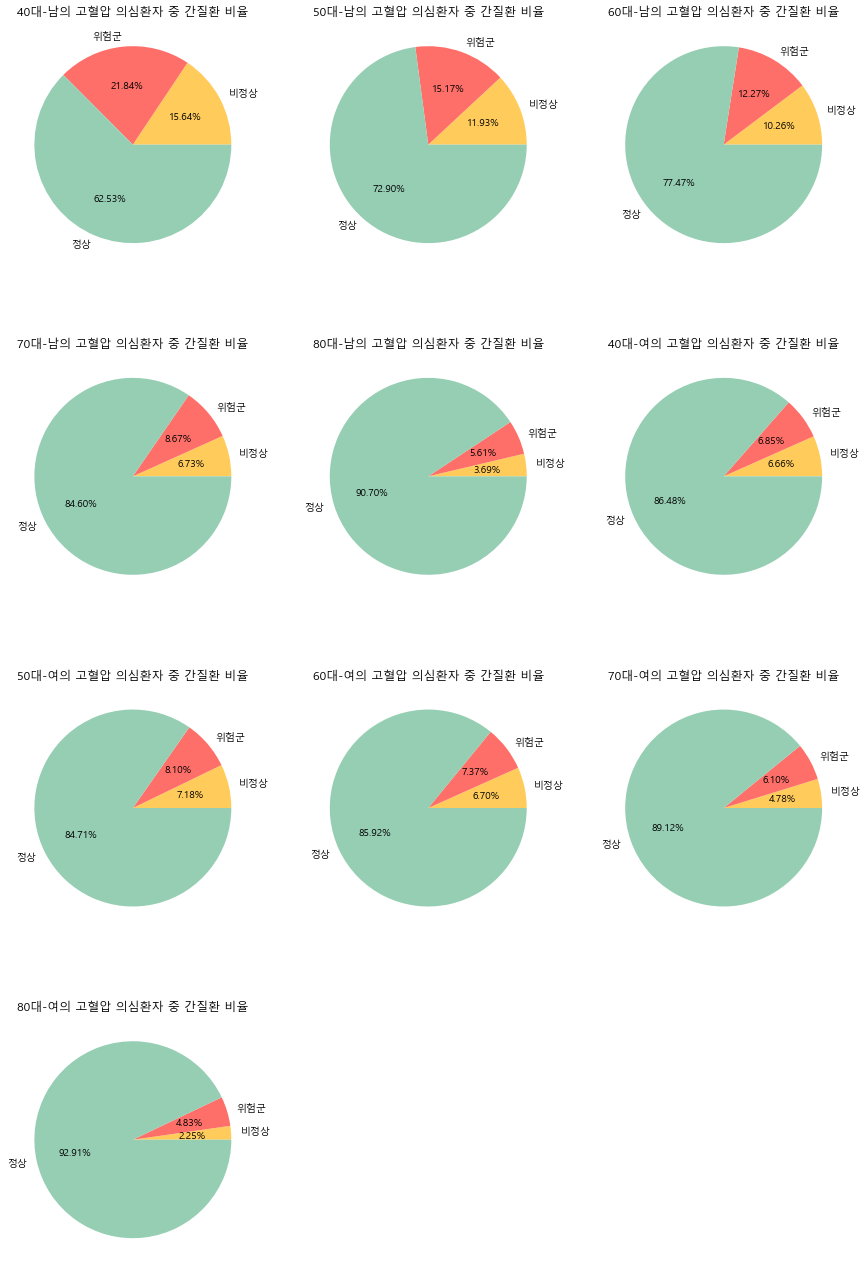

In [5]:
#고혈압이 있으면 간질환이 있을까?
df = 검진정보.groupby(["혈압","성별","연령대", "간질환"]).count()
df.reset_index(inplace=True)
df["사람수"]=df["기준년도"] 
df["성별-연령대"] = df["연령대"] + '-'+ df["성별"].astype(str)
df.drop(df.loc[:,"기준년도":"데이터 공개일자"],axis=1,inplace=True)

index = df[df['혈압'] !='고혈압'].index
df.drop(index, inplace=True)

n = len(df['성별-연령대'].unique())
j = 1
plt.figure(figsize = (15,60))

for i in (df['성별-연령대'].unique()):
    plt.subplot(n,3,j)
    df1 = df[df['성별-연령대']==i]
    df1 = df1.groupby(['간질환'])[['사람수']].sum()
    df1.reset_index(inplace=True)
    x = df1['사람수'].values
    labels = df1['간질환'].values
    color = ['#ffcc5c','#ff6f69', '#96ceb4']
    plt.pie(x,labels=labels, autopct='%.2f%%', colors = color)    
    plt.title(i+'의 고혈압 의심환자 중 간질환 비율')
    j += 1

plt.show()

### 혈압이 높은 고혈압 의심환자는 간질환을 가질 가능성이 높다  
- 40대 ~ 60대를 살펴보면 고혈압환자들이 정상혈압 사람보다 간질환 비율이 높다는 것을 확인 가능

# 혈압상태에 따른 당뇨병 여부

In [6]:
df = 검진정보.groupby(["혈압","성별","연령대", "당뇨"]).count()
df.reset_index(inplace=True)
df["사람수"]=df["기준년도"] 
df["성별-연령대"] = df["연령대"] + '-'+ df["성별"].astype(str)
df.drop(df.loc[:,"기준년도":"데이터 공개일자"],axis=1,inplace=True)

alt.Chart(df).mark_bar().encode(

    # tell Altair which field to group columns on
    x=alt.X('혈압:N', title=None),

    # tell Altair which field to use as Y values and how to calculate
    y=alt.Y('sum(사람수):Q',
        axis=alt.Axis(
            grid=False,
            title=None)),

    # tell Altair which field to use to use as the set of columns to be  represented in each group
    column=alt.Column('성별-연령대:N', title=None),

    # tell Altair which field to use for color segmentation 
    color=alt.Color('당뇨:N',
            scale=alt.Scale(
                # make it look pretty with an enjoyable color pallet
                range=['#ffcc5c','#ff6f69', '#96ceb4'],  
            ),
        ))\
    .configure_view(
        # remove grid lines around column clusters
        strokeOpacity=0    
    )

alt.Chart(...)

# 고혈압 환자는 당뇨일까?

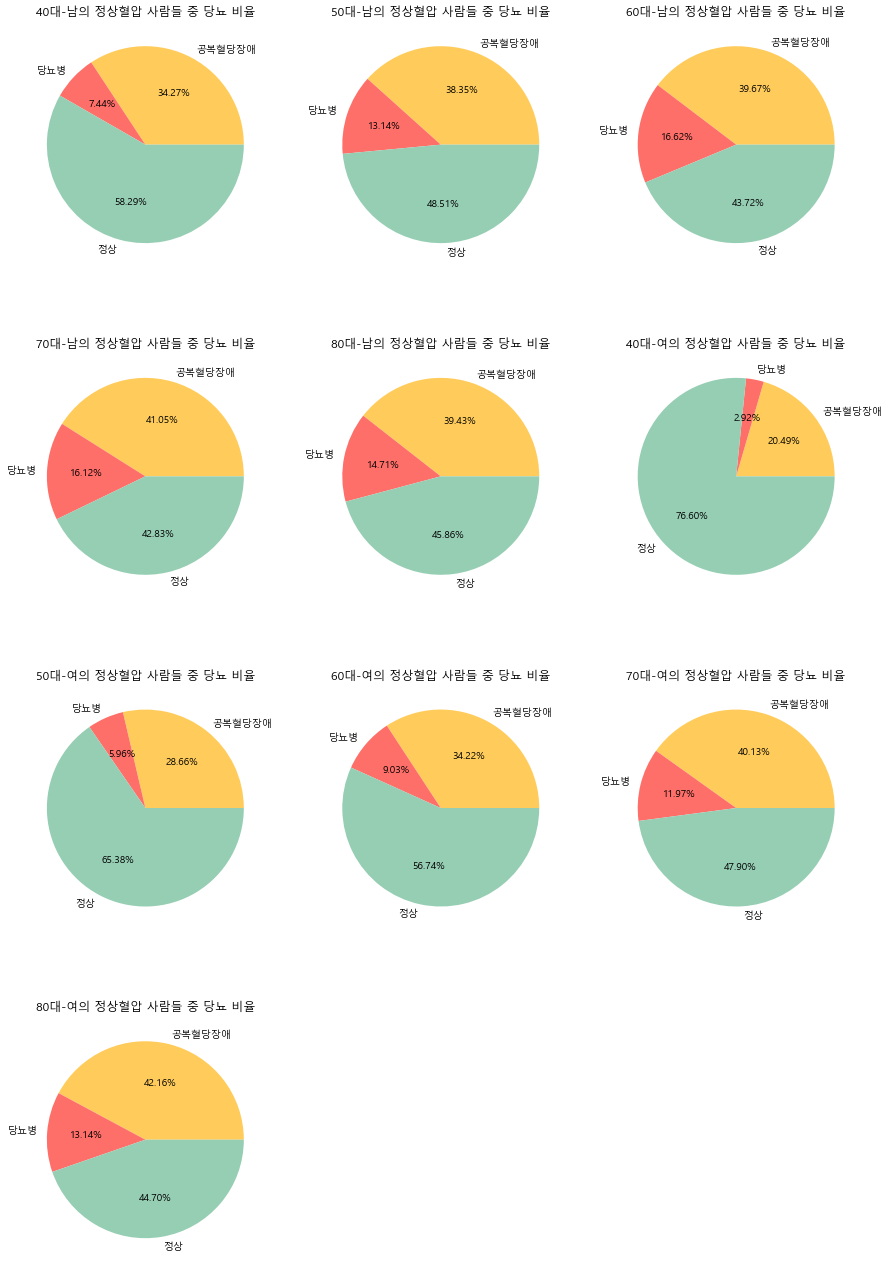

In [7]:
df = 검진정보.groupby(["혈압","성별","연령대", "당뇨"]).count()
df.reset_index(inplace=True)
df["사람수"]=df["기준년도"] 
df["성별-연령대"] = df["연령대"] + '-'+ df["성별"].astype(str)
df.drop(df.loc[:,"기준년도":"데이터 공개일자"],axis=1,inplace=True)

index = df[df['혈압'] !='정상혈압'].index
df.drop(index, inplace=True)


n = len(df['성별-연령대'].unique())
j = 1
plt.figure(figsize = (15,60))

for i in (df['성별-연령대'].unique()):
    plt.subplot(n,3,j)
    df1 = df[df['성별-연령대']==i]
    df1 = df1.groupby(['당뇨'])[['사람수']].sum()
    df1.reset_index(inplace=True)
    x = df1['사람수'].values
    labels = df1['당뇨'].values
    color = ['#ffcc5c','#ff6f69', '#96ceb4']
    plt.pie(x,labels=labels, autopct='%.2f%%', colors = color) 
    plt.title(i+'의 정상혈압 사람들 중 당뇨 비율')
    j += 1

plt.show()

# 고혈압 환자는 당뇨일까?

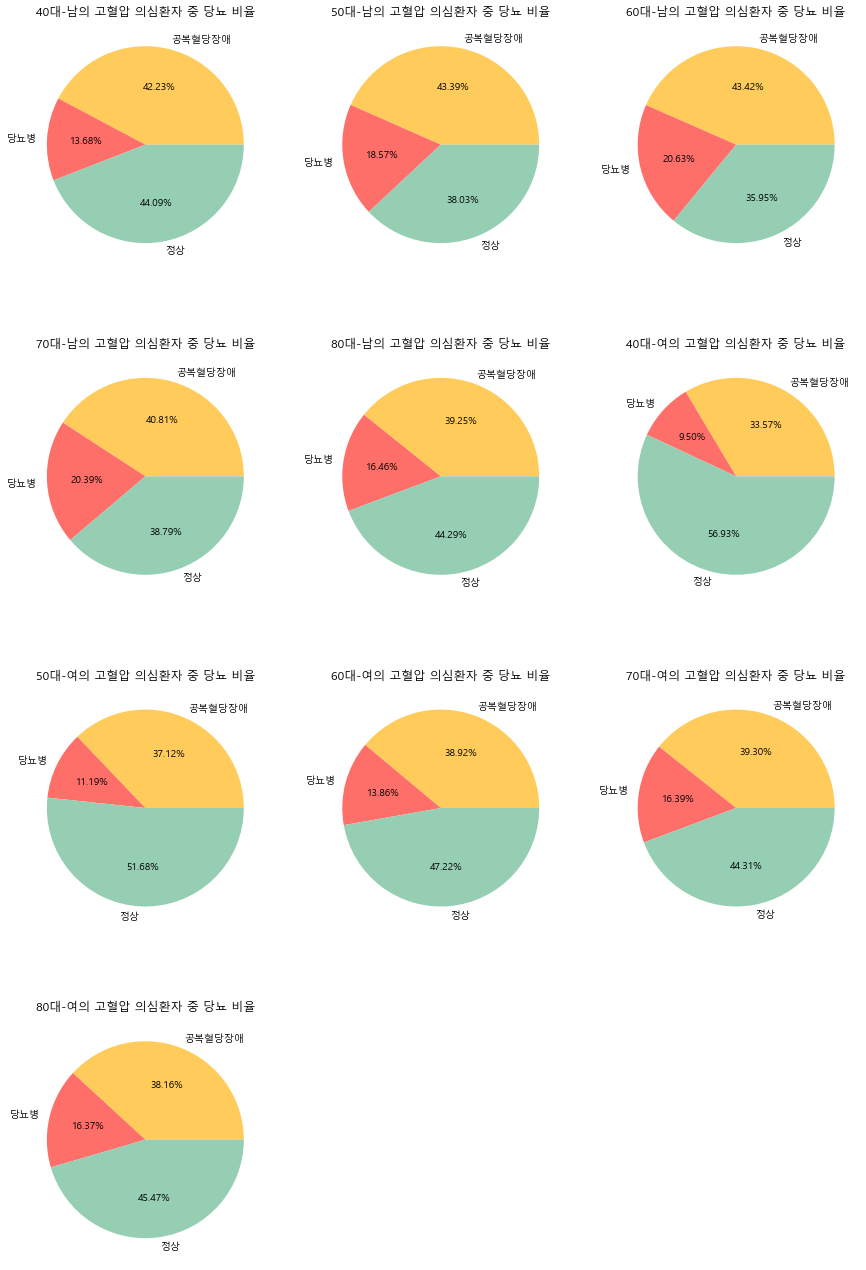

In [10]:
df = 검진정보.groupby(["혈압","성별","연령대", "당뇨"]).count()
df.reset_index(inplace=True)
df["사람수"]=df["기준년도"] 
df["성별-연령대"] = df["연령대"] + '-'+ df["성별"].astype(str)
df.drop(df.loc[:,"기준년도":"데이터 공개일자"],axis=1,inplace=True)

index = df[df['혈압'] !='고혈압'].index
df.drop(index, inplace=True)


n = len(df['성별-연령대'].unique())
j = 1
plt.figure(figsize = (15,60))

for i in (df['성별-연령대'].unique()):
    plt.subplot(n,3,j)
    df1 = df[df['성별-연령대']==i]
    df1 = df1.groupby(['당뇨'])[['사람수']].sum()
    df1.reset_index(inplace=True)
    x = df1['사람수'].values
    color = ['#ffcc5c','#ff6f69', '#96ceb4']
    plt.pie(x,labels=labels, autopct='%.2f%%', colors = color) 
    labels = df1['당뇨'].values  
    plt.title(i+'의 고혈압 의심환자 중 당뇨 비율')
    j += 1

plt.show()

### 고혈압 의심자는 공복혈당장애 및 당뇨를 가지고 있을 확률이 높음

- 40대 ~ 70대 그래프에서 차이를 보임
- 고혈압의 주요 원인 중 하나가 비만과 운동 부족  
- 습관은 혈당을 상승시켜 당뇨병 발병